In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data preprocessing

In [61]:
df_por = pd.read_csv("C:\\Users\\Hulda NIGNAN\\Downloads\\student+performance\\student\\student-por.csv", sep=";")
df_mat = pd.read_csv("C:\\Users\\Hulda NIGNAN\\Downloads\\student+performance\\student\\student-mat.csv", sep=";")
df = pd.concat([df_por, df_mat], axis=0, ignore_index=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [63]:
print("\nDataset shape:", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])


Dataset shape: (1044, 33)
Number of rows: 1044
Number of columns: 33


In [65]:
print("\nColumn names:")
print(df.columns.tolist())


Column names:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


In [67]:
print("Preview of the data:")
print(df.head())

Preview of the data:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [69]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [71]:
print(df.describe())

               age         Medu         Fedu   traveltime    studytime  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean     16.726054     2.603448     2.387931     1.522989     1.970307   
std       1.239975     1.124907     1.099938     0.731727     0.834353   
min      15.000000     0.000000     0.000000     1.000000     1.000000   
25%      16.000000     2.000000     1.000000     1.000000     1.000000   
50%      17.000000     3.000000     2.000000     1.000000     2.000000   
75%      18.000000     4.000000     3.000000     2.000000     2.000000   
max      22.000000     4.000000     4.000000     4.000000     4.000000   

          failures       famrel     freetime        goout         Dalc  \
count  1044.000000  1044.000000  1044.000000  1044.000000  1044.000000   
mean      0.264368     3.935824     3.201149     3.156130     1.494253   
std       0.656142     0.933401     1.031507     1.152575     0.911714   
min       0.000000     1.000000     1

In [73]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

## Exploratory Data Analysis

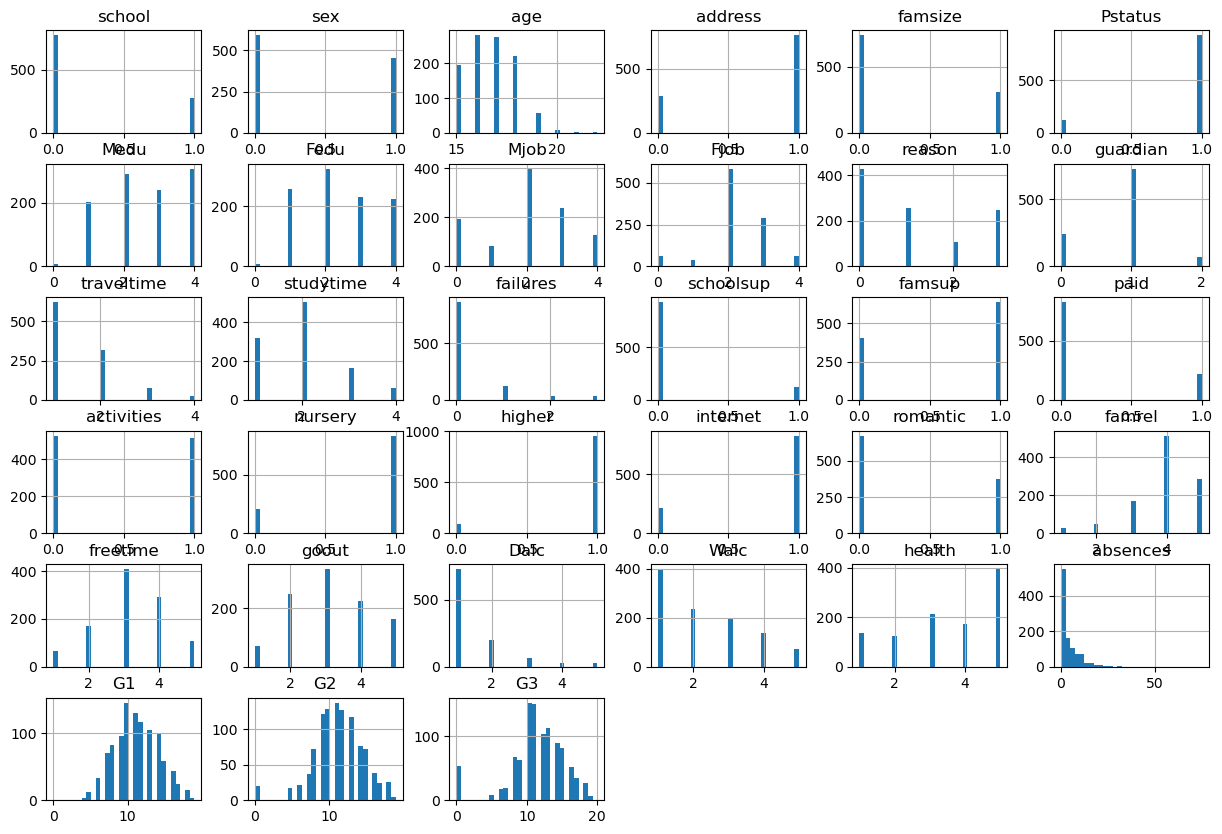

In [76]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


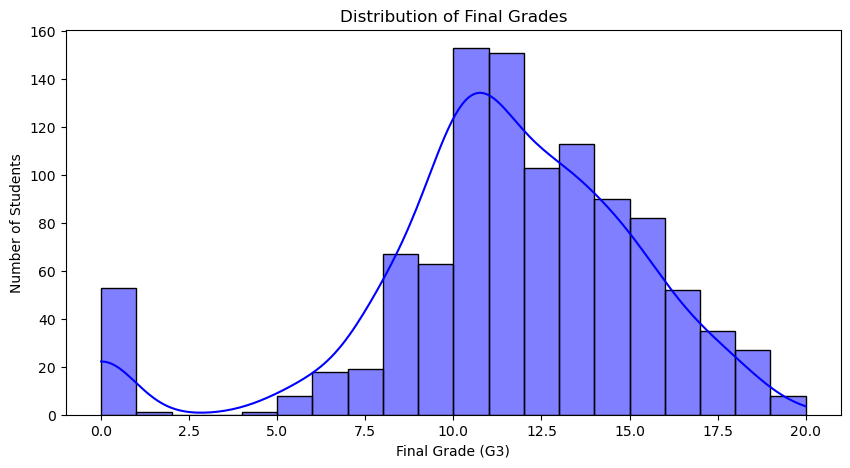

In [77]:
plt.figure(figsize=(10, 5))
sns.histplot(df["G3"], bins=20, kde=True, color="blue")
plt.title("Distribution of Final Grades")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.show()

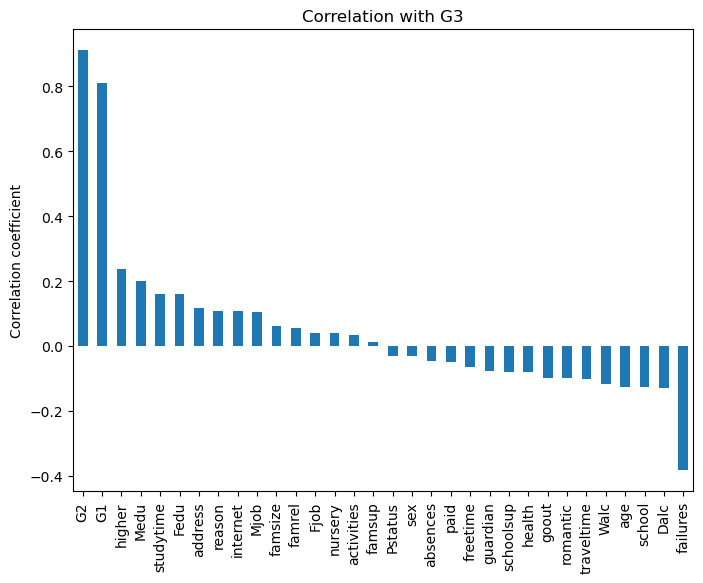

In [78]:
target = "G3"  
correlation_with_target = df.corr()[target].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
correlation_with_target.drop(target).plot(kind='bar')
plt.title(f"Correlation with {target}")
plt.ylabel("Correlation coefficient")
plt.show()

<Axes: >

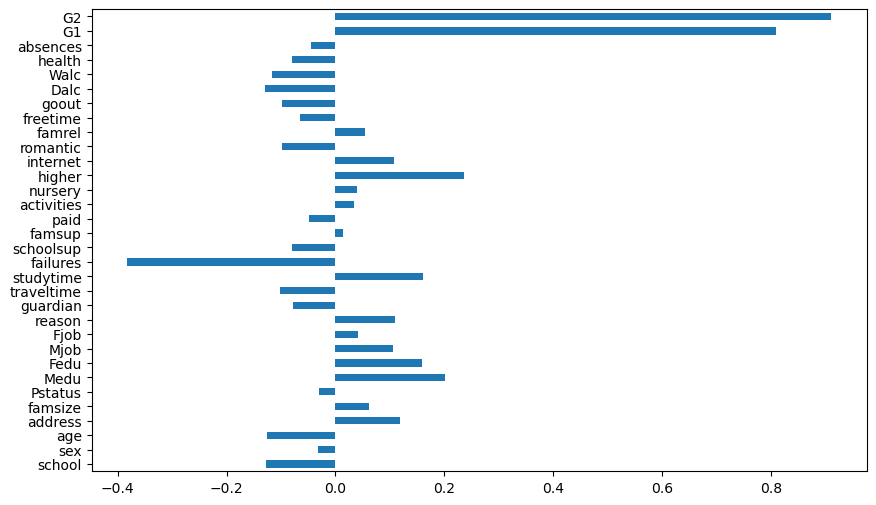

In [79]:
correlation_values = df.corr()['G3'].drop('G3')
correlation_values.plot(kind='barh', figsize=(10, 6))

In [80]:
correlation_values = df.corr()['G3'].drop('G3')
abs(correlation_values).sort_values(ascending=False)[:10]

G2           0.910743
G1           0.809142
failures     0.383145
higher       0.236578
Medu         0.201472
studytime    0.161629
Fedu         0.159796
Dalc         0.129642
school       0.127114
age          0.125282
Name: G3, dtype: float64

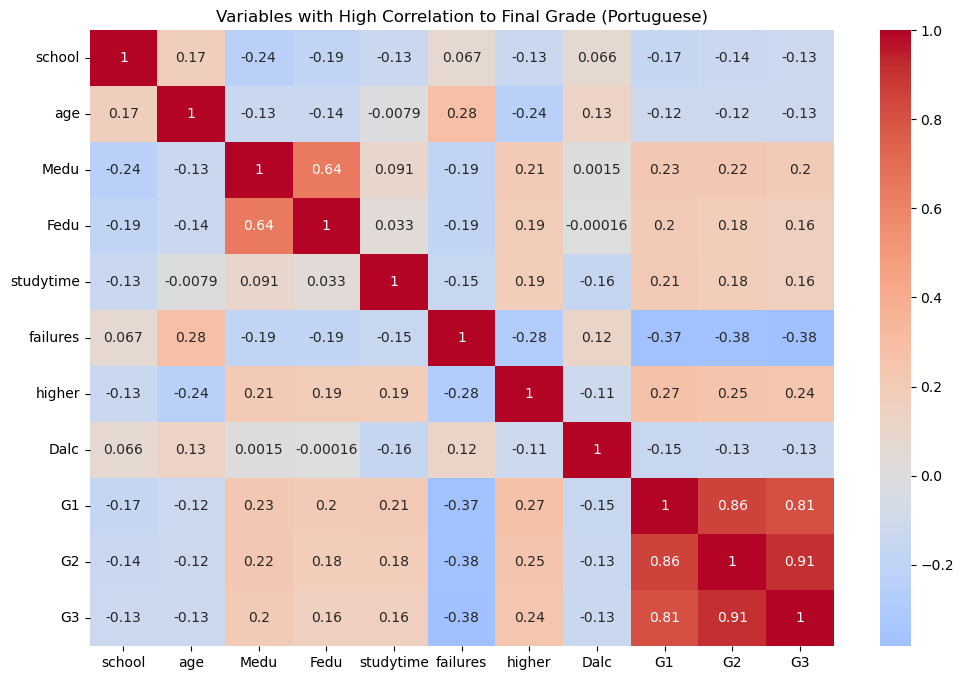

In [81]:
corr = df.corr()


high_corr_with_g3 = corr.index[abs(corr["G3"]) > 0.12].tolist()
filtered_corr = corr.loc[high_corr_with_g3, high_corr_with_g3]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Variables with High Correlation to Final Grade (Portuguese)")
plt.show()

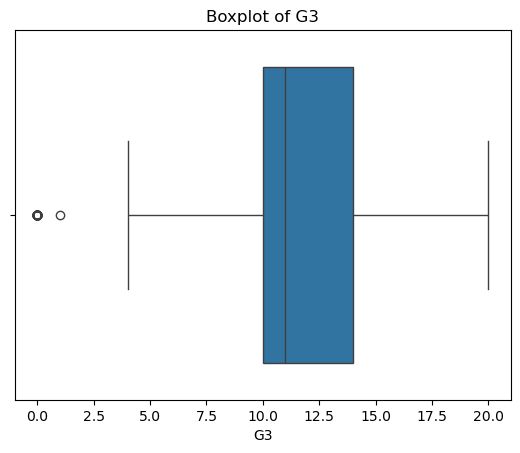

In [82]:
sns.boxplot(x=df['G3'])
plt.title("Boxplot of G3")
plt.show()

In [83]:
Q1 = df['G3'].quantile(0.25)
Q3 = df['G3'].quantile(0.75)


IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['G3'] < lower_bound) | (df['G3'] > upper_bound)]
print("Number of outliers in G3:", outliers.shape[0])

print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")


df['G3'] = df['G3'].apply(lambda x: lower_bound if x < lower_bound 
                          else upper_bound if x > upper_bound 
                          else x)

Number of outliers in G3: 54
Lower bound: 4.0, Upper bound: 20.0


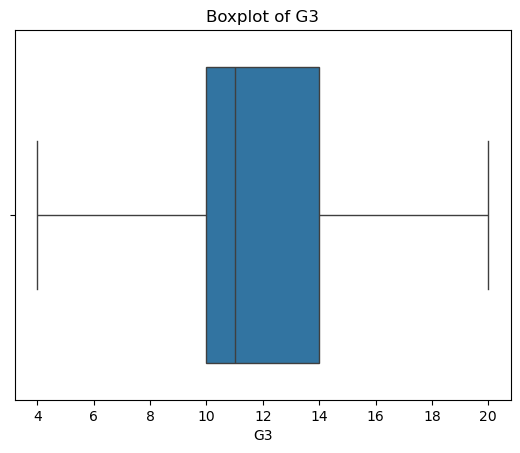

In [84]:
sns.boxplot(x=df['G3'])
plt.title("Boxplot of G3")
plt.show()

### Random Forest

In [91]:
features = ['school', 'sex', 'age', 'address', 'Pstatus', 'Medu', 'Mjob', 
           'Fedu', 'Fjob', 'guardian', 'famsize', 'famrel', 'reason',
           'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
           'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic',
           'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


X_A = df[features]      
y = df['G3']   # All features   

In [96]:
X_train_A, X_test_A, y_train, y_test = train_test_split(X_A, y, test_size=0.2, random_state=42)

In [99]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


categorical = ['school', 'sex', 'address', 'Pstatus', 'Mjob', 'Fjob', 
              'reason', 'guardian', 'famsize', 'schoolsup', 'famsup',
              'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
numerical = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
            'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
            'absences', 'G1', 'G2']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical),
        ('cat', OneHotEncoder(), categorical)
    ])

Training results and plots:
A (All features): RMSE = 1.10, MAE = 0.79, R² = 0.89


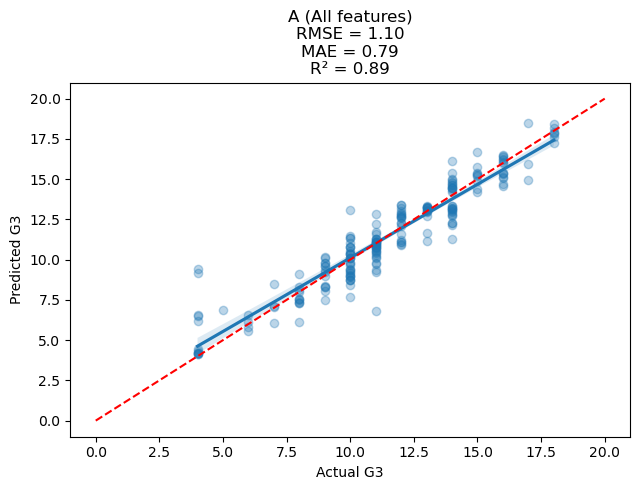

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

plt.figure(figsize=(18, 5)) 

print("Training results and plots:")

for i, (X_train, X_test, config) in enumerate(zip(
    [X_train_A],
    [X_test_A],
    ['A (All features)']
)):
    
    num_cols = [col for col in numerical if col in X_train.columns]
    cat_cols = [col for col in categorical if col in X_train.columns]
    
   
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), num_cols),
            ('cat', OneHotEncoder(), cat_cols)
        ]
    )
    
    
    rf_model = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(n_estimators=500, random_state=42))
    ])
    
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    
    
    rmse = root_mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{config}: RMSE = {rmse:.2f}, MAE = {mae:.2f}, R² = {r2:.2f}")
    
    
    plt.subplot(1, 3, i+1)
    sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.3})
    plt.plot([0, 20], [0, 20], '--r') 
    plt.title(f"{config}\nRMSE = {rmse:.2f}\nMAE = {mae:.2f}\nR² = {r2:.2f}")
    plt.xlabel("Actual G3")
    plt.ylabel("Predicted G3")

plt.tight_layout()
plt.show()
